In [1]:
#HW 3B


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [ ]:
"""
1. Generate 200 points (100 from Class A, 100 from Class B) from the normal-mixture data set as described above. Plot a scatterplot.

"""

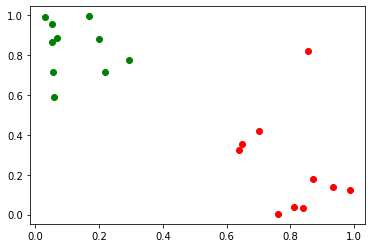

In [147]:
#use numpy.random.normal()

A = np.array((abs(np.random.normal(loc=0.0, scale=0.25, size=10)), abs(np.random.normal(loc=0.0, scale=0.25, size=10)))).T
for coord in A:
    coord[0] =  math.fmod(coord[0], 1)
    coord[1] =  1 - (math.fmod(coord[1], 1))

plt.scatter([item[0] for item in A], [item[1] for item in A], color="Green")

B = np.array((abs(np.random.normal(loc=0.0, scale=0.25, size=10)), abs(np.random.normal(loc=0.0, scale=0.25, size=10)))).T
for coord in B:
    coord[0] =  1 - (math.fmod(coord[0], 1))
    coord[1] =  math.fmod(coord[1], 1)

plt.scatter([item[0] for item in B], [item[1] for item in B], color="Red")

In [143]:
lower, upper = 0, 1
def distribution(mu, sigma):
    return np.array(stats.truncnorm.rvs((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma, size = 10))

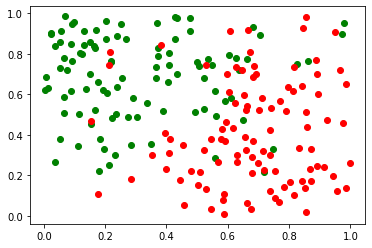

In [150]:
for i, coord in enumerate(A):
    if i == 0:
        clusterA = np.stack((distribution(coord[0], 1/3), distribution(coord[1], 1/3)), axis = 1)
    else:
        clusterA = np.concatenate((clusterA, np.stack((distribution(coord[0], 1/3), distribution(coord[1], 1/3)),axis = 1)), axis = 0)

plt.scatter([item[0] for item in clusterA], [item[1] for item in clusterA], color="Green")

for i, coord in enumerate(B):
    if i == 0:
        clusterB = np.stack((distribution(coord[0], 1/3), distribution(coord[1], 1/3)), axis = 1)
    else:
        clusterB = np.concatenate((clusterB, np.stack((distribution(coord[0], 1/3), distribution(coord[1], 1/3)),axis = 1)), axis = 0)

plt.scatter([item[0] for item in clusterB], [item[1] for item in clusterB], color="Red")

In [ ]:
""" 
2. Visualize the Bayes decision boundary between the two classes, the surfaces where the (true) density in Class A 
    equals the density in Class B. You can use contour maps to approximate the boundary or you can solve for the 
    boundaries numerically.
"""


In [174]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [161]:
X_train = np.concatenate((clusterA, clusterB), axis = 0)

Y_train = np.concatenate((np.full((100,1), 0), np.full((100,1), 1)), axis = 0)


In [172]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

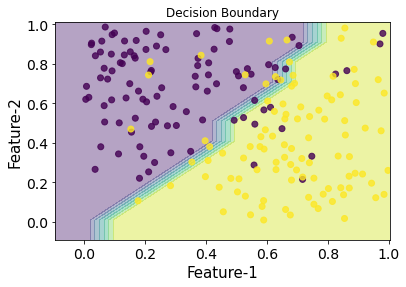

In [173]:
plt.figure()
plt.title("Decision Boundary")
plot_decision_boundaries(X_train, Y_train, GaussianNB)
plt.show()

In [176]:
from sklearn.naive_bayes import ComplementNB

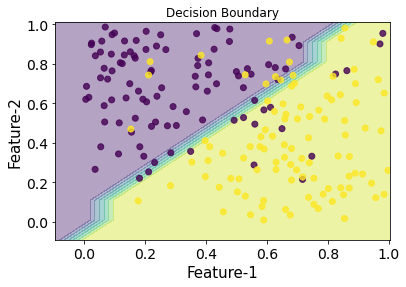

In [177]:
plt.figure()
plt.title("Decision Boundary")
plot_decision_boundaries(X_train, Y_train, ComplementNB)
plt.show()